<h2 id="Contents">Contents<a href="#Contents"></a></h2>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Particle-in-E-and-B-Field">Particle in E and B Field</a></li>
<ol><li><a class="" href="#No-Magnetic-Field">No Magnetic Field</a></li>
<ol><li><a class="" href="#Leapfrog-Method">Leapfrog Method</a></li>
</ol><li><a class="" href="#No-Electric-Field">No Electric Field</a></li>
<ol><li><a class="" href="#The-Lorentz-Integrator">The Lorentz Integrator</a></li>
</ol><li><a class="" href="#Boris-Method">Boris Method</a></li>
<ol><li><a class="" href="#Theory">Theory</a></li>
<li><a class="" href="#Implementation">Implementation</a></li>
<ol><li><a class="" href="#Step-1">Step 1</a></li>
<li><a class="" href="#Step-2">Step 2</a></li>
<li><a class="" href="#Step-3">Step 3</a></li>
<li><a class="" href="#Step-4">Step 4</a></li>
<li><a class="" href="#Step-5">Step 5</a></li>
<li><a class="" href="#Step-6">Step 6</a></li>
<li><a class="" href="#Putting-It-Together">Putting It Together</a></li>
</ol><li><a class="" href="#Creating-a-Class-for-Boris-Method">Creating a Class for Boris Method</a></li>
</ol>

# Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()

# Particle in E and B Field

Let's consider a charged particle in an electric and magnetic field. The Equation of motion are:
$$
\frac{d\mathbf{r}}{dt} = \mathbf{v}\\
m\frac{d\mathbf{v}}{dt} = q(\mathbf{E}+\mathbf{B}\times \mathbf{v})
$$

Let's consider one dimensional case with $\mathbf{B}\times \mathbf{v} =0$

## No Magnetic Field

The equation of motion becomes:
$$
\frac{dx}{dt} = v\\
m\frac{dv}{dt} = qE
$$

The forward difference method gives the update equations as:
$$
v_{n+1} = v_n + \frac{q}{mE}dt\\
x_{n+1} = x_n + v_{n+1}dt
$$
The elctric field we'll be using will be such that the corresponding motion is SHM. This can be realized by using:
$$
E=-(m/q)\omega_p^2x
$$

Let's implement this:

In [20]:
m = 1
q = 1
omega = 2*np.pi
def E(x):
    return -(m/q)*omega**2*x

In [21]:
TIME_PERIODS = 5
N = 100*TIME_PERIODS
dt = 0.01
x = np.zeros(N)
v = np.zeros(N)
x[0] = 0
v[0] = 1

In [22]:
for i in range(N-1):
    v[i+1] = v[i] + (q*dt*E(x[i]))/(m)
    x[i+1] = x[i] + v[i]*dt

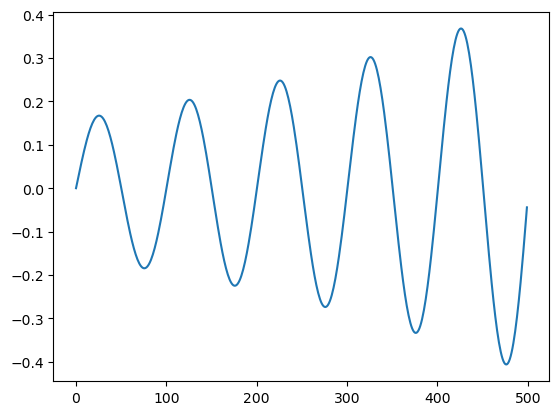

In [23]:
plt.plot(x)

We see that the amplitude is increasing meaning that the energy is also increasing. This is not possible.

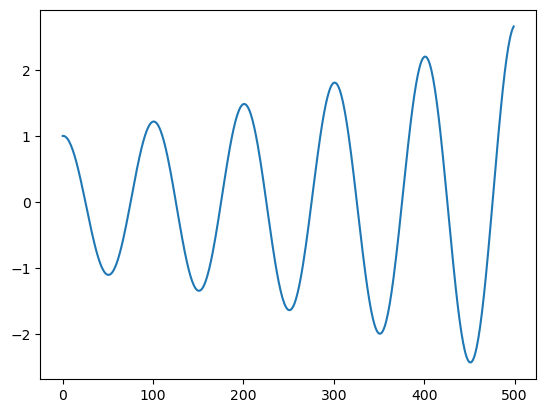

In [24]:
plt.plot(v)

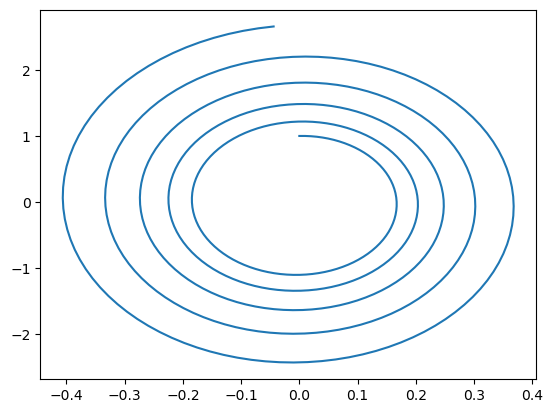

In [25]:
plt.plot(x, v)

It seema obvoius that energy is not conserved. Let's visualize the energy evolution.

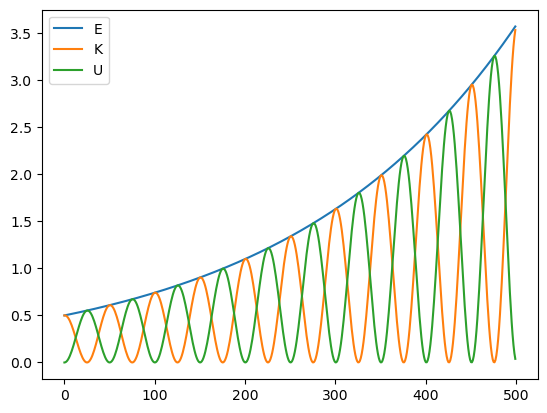

In [26]:
U = -E(x)*x*0.5
K = 0.5*m*v**2
E_tot = K + U

plt.plot(E_tot, label='E')
plt.plot(K, label='K')
plt.plot(U, label='U')
plt.legend();

Energy is definetly not conserved.

### Leapfrog Method

The problem with the Forward Difference method arises from the fact that it uses velocity at time “n” to push the particle from “n” to “n+1”. What makes more physical sense is to use the average velocity, the velocity that would exist at time “n+1/2”. This is the premise of the leapfrog method. Velocity and position integration leap over each other, being displaced by half a time step.

In [46]:
TIME_PERIODS = 5
N = 100*TIME_PERIODS
dt = 0.01
x = np.zeros(N)
v = np.zeros(N)
x[0] = 0
v[0] = 1
v = v- 0.5*(q*dt*E(x[i]))/(m)
for i in range(N-1):
    v[i+1] = v[i] + (q*dt*E(x[i]))/(m)
    x[i+1] = x[i] + v[i+1]*dt

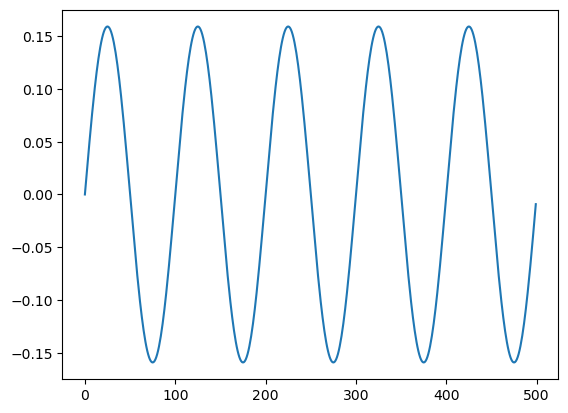

In [47]:
plt.plot(x)

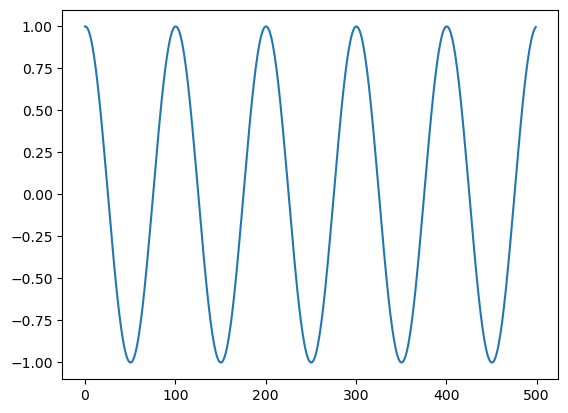

In [48]:
plt.plot(v)

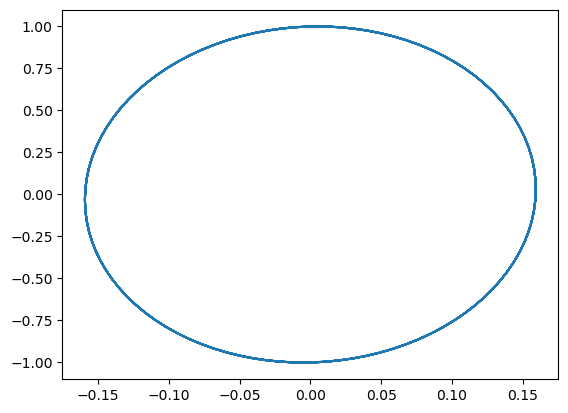

In [49]:
plt.plot(x, v)

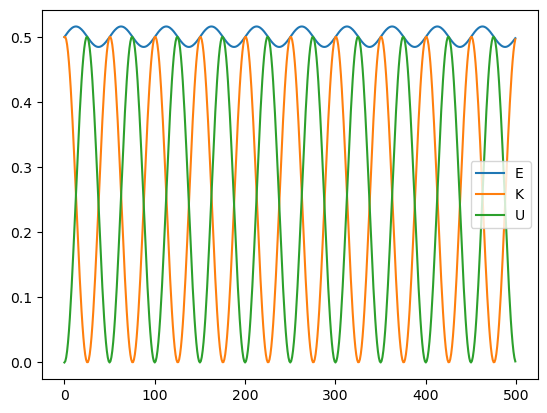

In [50]:
U = -E(x)*x*0.5*q
K = 0.5*m*v**2
E_tot = K + U

plt.plot(E_tot, label='E')
plt.plot(K, label='K')
plt.plot(U, label='U')
plt.legend();

## No Electric Field

In this case, the equation of motion becomes:
$$
\frac{d\mathbf{x}}{dt} = \mathbf{v}\\
m\frac{d\mathbf{v}}{dt} = q\mathbf{v}\times\mathbf{B}
$$

Let's implement this:

In [256]:
N = 10000
dt = 0.01
X = np.zeros((3, N))
V = np.zeros((3, N))
X[:, 0] = [0, 0, 0]
V[:, 0] = [1, 0, 0]
q = 1
m = 1.0

We'll use constant magnetic field.

In [261]:
def B(X):
    return 1

In [262]:
for i in range(N-1):
    V[0, i+1] = V[0, i] + (q*dt*B(X)*V[1, i])/(m)
    V[1, i+1] = V[1, i] - (q*dt*B(X)*V[0, i])/(m)
    X[:, i+1] = X[:, i] + V[:, i+1]*dt

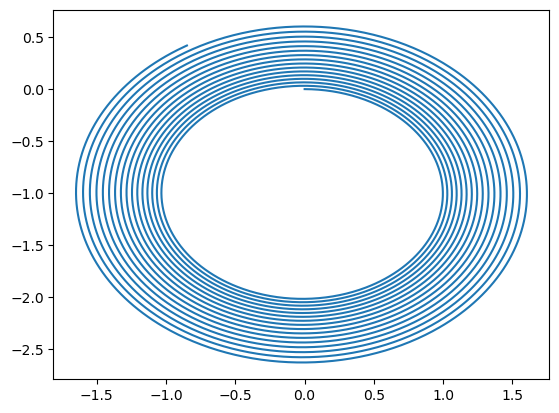

In [263]:
plt.plot(X[0, :], X[1, :])

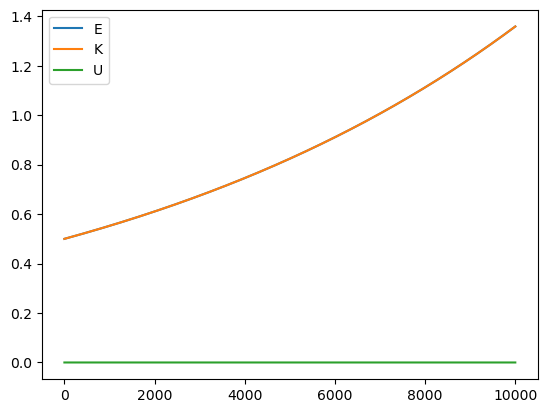

In [267]:
U = np.zeros(N)
v = np.linalg.norm(V, axis=0)
K = 0.5*m*v**2
E_tot = K + U

plt.plot(E_tot, label='E')
plt.plot(K, label='K')
plt.plot(U, label='U')
plt.legend();

### The Lorentz Integrator

We are getting the same problem as for the $E=0$ case. The solution of this is the same as for the $E=0$ case. Instead of updating the velocity from time $n-1/2$ to $n+1/2$ using the velocity at $n-1/2$, we should use the average velocity at time $n$. This modifies our Lorentz force integrator to:
$$
\begin{array}{rcl} 
\displaystyle\mathbf{v}^{n+1/2} &=& \mathbf{v}^{n-1/2}+\dfrac{q}{m}\left[\mathbf{E} + \mathbf{v}^{n}\times\mathbf{B}\right]\Delta t \\ 
\displaystyle&=& \mathbf{v}^{n-1/2}+\dfrac{q}{m}\left[\mathbf{E} + \dfrac{\mathbf{v}^{n-1/2}+\mathbf{v}^{n+1/2}}{2}\times\mathbf{B}\right]\Delta t 
\end{array}
$$

This expression can be rewritten in matrix notation as:
$$ \displaystyle\left[\mathbf{I}-\mathbf{R}\epsilon\right] \mathbf{v}^{n+1/2} = 
\left[\mathbf{I}+\mathbf{R}\epsilon\right] \mathbf{v}^{n-1/2}+\frac{q}{m}\mathbf{E}\Delta t$$
Where $\mathbf{I}$ is the identity matrix, $\mathbf{R}$ is the rotation matrix, given by
$$
\mathbf{R}=\dfrac{1}{B}\left(\begin{array}{ccc} 
0 & B_z & -B_y\\ 
-B_z & 0 & B_x\\ 
B_y & -B_x & 0\end{array}\right)
$$
while $\epsilon$ is
$$
\epsilon = \dfrac{qB}{m}\Delta t/2=\omega_c\Delta t/2
$$

Unfortunately, this equation is implicit, and solving it requires performing a matrix inversion. The solution is given by:
$$
\displaystyle\mathbf{v}^{n+1/2}=[\mathbf{I}-\mathbf{R}\epsilon]^{-1}[\mathbf{I}+\mathbf{R}\epsilon]\mathbf{v}^{n-1/2} 
+[\mathbf{I}-\mathbf{R}\epsilon]^{-1}\mathbf{E}\dfrac{q}{m}\Delta t
$$
The inverse is given by:
$$
[\mathbf{I}-\mathbf{R}\epsilon]^{-1} = \dfrac{1}{\det(\mathbf{I}-\mathbf{R}\epsilon)} \left( 
\begin{array}{ccc} 
1+\epsilon^2b_x^2 & \epsilon b_z + \epsilon^2b_x b_y & -\epsilon b_y+\epsilon^2b_x b_z\\ 
-\epsilon b_z + \epsilon^2 b_xb_y & 1+\epsilon^2b_y^2 & \epsilon b_x + \epsilon^2b_yb_z\\ 
\epsilon b_y + \epsilon^2b_xb_z & -\epsilon b_x+\epsilon^2 b_y b_z & 1+\epsilon^2b_z^2 
\end{array}\right)
$$

This is the Tajima's explicit method.

We can, in principle, use this to calculate the trajectory. However this is computationally expensive. We can, using the approximation:
$$[\mathbf{I}-\mathbf{R}\epsilon]^-1 \simeq \mathbf{I} + \mathbf{R}\epsilon + \ldots$$
obtain a solution which is less expensive to compute. Using this approximation, the update equation becomes:
$$
\begin{array}{rcl}
\mathbf{v}^{n+1/2} &=&[\mathbf{I}+\mathbf{R}\epsilon][\mathbf{I}+\mathbf{R}\epsilon]\mathbf{v}+
[\mathbf{I}+\mathbf{R}\epsilon]\mathbf{E}\dfrac{q}{m}\Delta t\\
&=&\dfrac{q}{m}\mathbf{E}\dfrac{\Delta t}{2}+(\mathbf{I}+\mathbf{R}\epsilon)\left[\mathbf{v}^{n-1/2}+\dfrac{q}{m}\dfrac{\Delta t}{2}\mathbf{E}\right]
\end{array}
$$


This is Tazima's implicit method. Let's implement this.

Even now, the above method does not work well. In fact, this gives almost the same result as the leapfrog method.

## Boris Method

### Theory

Boris method is an alternative to the Tazima's explicit method. The goal again, is to solve for $\mathbf{v}^{n+1/2}$ from:
$$
\displaystyle \frac{\mathbf{v}^{n+1/2}-\mathbf{v}^{n-1/2}}{\Delta t} = \frac{q}{m}\left[\mathbf{E}+\frac{\mathbf{v}^{n+1/2}+\mathbf{v}^{n-1/2}}{2}\times\mathbf{B}\right]
$$

The idea of Boris was that we can eliminate the electric field by defining:
$$
\begin{array}{rcl} 
\mathbf{v}^{n-1/2} &=&\mathbf{v}^{-} – \dfrac{q\mathbf{E}}{m}\dfrac{\Delta t}{2} \qquad \qquad (1)\\ 
& &\\ 
\mathbf{v}^{n+1/2} &=& \mathbf{v}^{+} + \dfrac{q\mathbf{E}}{m}\dfrac{\Delta t}{2} \qquad\qquad (2) 
\end{array}
%%

When these definitions are substituted into the original equation, we obtain pure rotation
$$
\dfrac{\mathbf{v}^{+}-\mathbf{v}^{-}}{\Delta t} = \dfrac{q}{2m}\left(\mathbf{v}^{+}+\mathbf{v}^{-}\right)\times\mathbf{B}
$$

To calculate the post-rotation velocity the first step is to find the vector bisecting the angle formed by the pre- and the (to be yet computed) post-rotation velocity. he angle through which the velocity will rotate in the given time step is:
$$
\tan(\theta/2)=-(qB){m}\Delta t/2\\
\Rightarrow \mathbf{t}\equiv-\hat{\mathbf{b}}\tan\theta/2 = (q\mathbf{B}/m)\Delta t/2
$$

The bisector vector is then:
$$\mathbf{v}'=\mathbf{v}^{-}+\mathbf{v}^{-}\times\mathbf{t} \qquad\qquad(3)$$

Next, we define another vector $\mathbf{s}$:
$$
\mathbf{s}=\dfrac{2\mathbf{t}}{1+t^2}
$$
This vector $\mathbf{s}$ is just a version of the rotation vector $\mathbf{t}$ scaled to satisfy the requirement that magnitude of velocity remains constant in the rotation. Using this, we get:
$$
\mathbf{v}^{+}=\mathbf{v}^{-}+\mathbf{v}'\times\mathbf{s}\qquad\qquad(4)
$$

### Implementation

Using these four equations, we can calculate the post-rotation velocity. Let's implement this in the code. The steps are:
1. Get $\mathbf{v}^{-}$ using equation (1)
2. Calculate $\mathbf{t}$
3. Caluclate $\mathbf{v}'$ using equation (3)
4. Calculate $\mathbf{s}$
5. Calculate $\mathbf{v}^{+}$ using equation (4)
6. Invert equation (1) to get $\mathbf{v}^{n+1/2}$
7. Get $\mathbf{X}$ using the value of $\mathbf{v}^{n+1/2}$

Let's get started!

#### Step 1

In [51]:
q, m, omega = 1, 1, 2*np.pi
dt = 1e-4

In [52]:
def V_minus(X: np.ndarray, E: callable, V_prev: np.ndarray)->np.ndarray:
    return V_prev + (q*dt*E(X))/(2*m)

#### Step 2

In [53]:
def t_vector(B: callable, X: np.ndarray,)->np.ndarray:
    return (q*B(X)*dt)/(2*m)

#### Step 3

In [54]:
def v_prime(v_minus: np.ndarray, t_vector: np.ndarray)->np.ndarray:
    return v_minus + np.cross(v_minus, t_vector)

#### Step 4

In [55]:
def s_vector(t_vector: np.ndarray)->np.ndarray:
    t_mag = np.linalg.norm(t_vector)
    return (2*t_vector)/(1+t_mag**2)

#### Step 5

In [56]:
def v_plus(v_minus: np.ndarray, v_prime: np.ndarray, s_vector: np.ndarray)->np.ndarray:
    return v_minus + np.cross(v_prime, s_vector)

#### Step 6

In [57]:
def v_next(X: np.ndarray, E: callable, V_plus: np.ndarray)->np.ndarray:
    return V_plus + (q*dt*E(X))/(2*m)

#### Putting It Together

In [58]:
def update_v(X: np.ndarray, E: callable, B: callable, V_prev: np.ndarray)->np.ndarray:
    v_minus_val = V_minus(X, E, V_prev)
    t_vector_val = t_vector(B, X)
    v_prime_val = v_prime(v_minus_val, t_vector_val)
    s_vector_val = s_vector(t_vector_val)
    v_plus_val = v_plus(v_minus_val, v_prime_val, s_vector_val)
    v_next_val = v_next(X, E, v_plus_val)
    return v_next_val

In [59]:
def B(X):
    return np.array([0, 0, 1])

def E(X):
    return np.array([0, 0, 0])


In [60]:
N = 1000
dt = 0.01
X = np.zeros((N, 3))
V = np.zeros((N, 3))
X[0] = [0, 0, 0]
V[0] = [0, 1, 0]
q = 1.0
m = 1.0

for i in range(N-1):
    V[i+1] = update_v(X[i], E, B, V[i])
    X[i+1] = X[i] + V[i+1]*dt

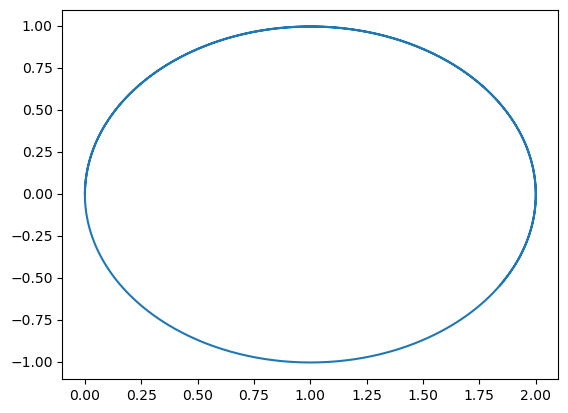

In [61]:
plt.plot(X[:, 0], X[:, 1]);

In [88]:
def get_potential_energy(E, X):
    U = np.zeros(shape = (1000, 3))
    for i in range(N):
        U[i] = -E(X)*X[i]
    return U

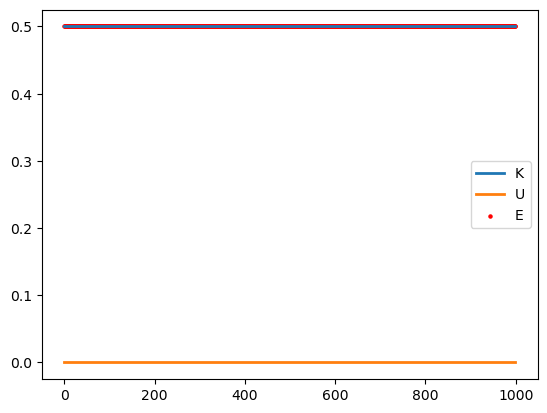

In [93]:
U = get_potential_energy(E, X)
U = np.linalg.norm(U, axis=1)
v = np.linalg.norm(V, axis=1)
K = 0.5*m*v**2
E_tot = K + U

plt.plot(K, label='K', lw=2)
plt.plot(U, label='U', lw=2)
plt.scatter(y=E_tot, x=np.arange(len(K)), label='E', s=5, c='r')
plt.legend();

## Creating a Class for Boris Method

In [55]:
class BorisMethod:
    """
    Solves trajectory of a single particle using the Boris method.\\
    Needs the electric and magnetic field functions defined on every point in space.
    Dimension should be 3.\\
    Also requires the initial conditions.

    """
    def __init__(self, q=1, m=1, dt=1e-4):
        self.q = q
        self.m = m
        self.dt = dt

    def V_minus(self, X: np.ndarray, E: callable, V_prev: np.ndarray)->np.ndarray:
        return V_prev + (self.q*self.dt*E(X))/(2*self.m)

    def t_vector(self, B: callable, X: np.ndarray,)->np.ndarray:
        return (self.q*B(X)*self.dt)/(2*self.m) 

    def v_prime(self, v_minus: np.ndarray, t_vector: np.ndarray)->np.ndarray:
        return v_minus + np.cross(v_minus, t_vector)
    
    def s_vector(self, t_vector: np.ndarray)->np.ndarray:
        t_mag = np.linalg.norm(t_vector)
        return (2*t_vector)/(1+t_mag**2)
    
    def v_plus(self, v_minus: np.ndarray, v_prime: np.ndarray, s_vector: np.ndarray)->np.ndarray:
        return v_minus + np.cross(v_prime, s_vector)

    def v_next(self, X: np.ndarray, E: callable, V_plus: np.ndarray)->np.ndarray:
        return V_plus + (self.q*self.dt*E(X))/(2*self.m)

    def update_v(self, X: np.ndarray, E: callable, B: callable, V_prev: np.ndarray)->np.ndarray:
        v_minus_val = self.V_minus(X, E, V_prev)
        t_vector_val = self.t_vector(B, X)
        v_prime_val = self.v_prime(v_minus_val, t_vector_val)
        s_vector_val = self.s_vector(t_vector_val)
        v_plus_val = self.v_plus(v_minus_val, v_prime_val, s_vector_val)
        v_next_val = self.v_next(X, E, v_plus_val)
        return v_next_val

    def solve(self,E: callable, B: callable, iv: tuple, N: int)->np.ndarray:
        """
        Solves the trajectory of a single particle using the Boris method.\\
        
        Parameters
        ----------
        E : callable
            Electric field function.
        B : callable
            Magnetic field function.
        iv : tuple
            Initial conditions.
        N : int
            Number of steps.

        Returns
        -------
        tuple of np.ndarray
            Trajectory of the particle. (X, V)
        """
        X = np.zeros((N, len(iv[0])))
        V = np.zeros((N, len(iv[0])))
        X[0] = iv[0]
        V[0] = iv[1]

        for i in range(N-1):
            V[i+1] = self.update_v(X[i], E, B, V[i])
            X[i+1] = X[i] + V[i+1]*self.dt
        return X, V

In [56]:
def B(X):
    return np.array([0, 0, 1])

def E(X):
    return np.array([0, 0, 0])

iv = ([0, 0, 0], [0, 1, 0])
bm = BorisMethod(q=1, m=1, dt=1e-2)
X, V = bm.solve(E, B, iv, N=1000)

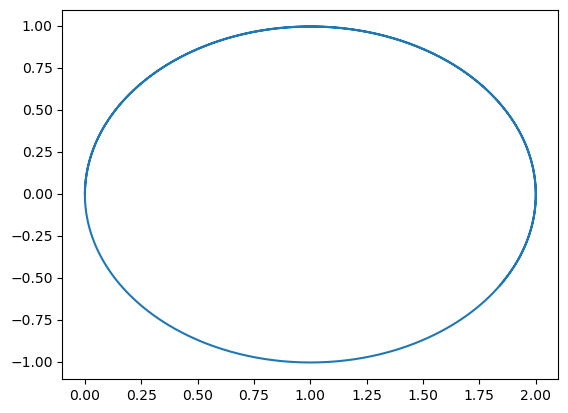

In [57]:
plt.plot(X[:, 0], X[:, 1]);